# Regression in Prediction

In [11]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

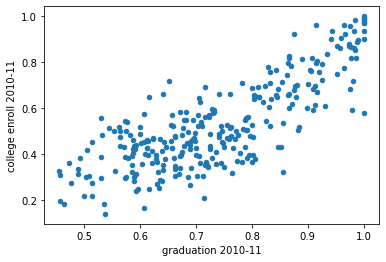

In [2]:
school = pd.read_csv("ICE1_Data.csv")
graduationCollege = school[['graduation 2010-11', 'college enroll 2010-11']].dropna()

graduation = graduationCollege.loc[:,"graduation 2010-11"].values.reshape(-1, 1)
college = graduationCollege.loc[:,"college enroll 2010-11"].values.reshape(-1, 1)

graduationCollege.plot.scatter(x = 'graduation 2010-11', y = 'college enroll 2010-11')

In [3]:
model = LinearRegression()
model.fit(graduation, college)
print("The intercept is: ", model.intercept_)
print("The slope is: ", model.coef_)

The intercept is:  [-0.27965123]
The slope is:  [[1.09914898]]


In [4]:
college_pred = model.predict(graduation)

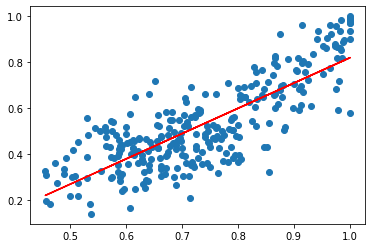

In [5]:
plt.scatter(graduation, college)
plt.plot(graduation, college_pred, color = 'red')
plt.show()

In [34]:
videoData = pd.read_csv("ICE3_data.csv")
videoData

,stid,year,video,participation,watch.time,confusion.points,key.points
0,1,2018,A,1,16.5,6,6
1,2,2018,A,0,0.0,0,0
2,3,2018,A,1,9.0,4,6
3,4,2018,A,1,20.0,8,5
4,5,2018,A,1,12.0,8,5
...,...,...,...,...,...,...,...
295,56,2019,E,1,12.0,6,2
296,57,2019,E,1,17.5,10,1
297,58,2019,E,1,6.0,4,1
298,59,2019,E,0,0.0,0,0


In [35]:
videoData.describe()

,stid,year,participation,watch.time,confusion.points,key.points
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,30.500000,2018.500000,0.743333,9.302500,4.426667,2.326667
std,17.347038,0.500835,0.437524,8.396475,3.606658,1.921526
min,1.000000,2018.000000,0.000000,0.000000,0.000000,0.000000
25%,15.750000,2018.000000,0.000000,0.000000,0.000000,0.000000
50%,30.500000,2018.500000,1.000000,8.375000,5.000000,2.000000
75%,45.250000,2019.000000,1.000000,15.750000,8.000000,4.000000
max,60.000000,2019.000000,1.000000,32.500000,13.000000,7.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8506c274f0>,
      dtype=object)

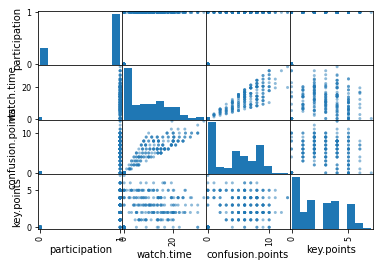

In [36]:
pd.plotting.scatter_matrix(videoData.iloc[:,3:])

In [28]:
norvideoData=videoData
norvideoData['watch.time']=(videoData['watch.time']-np.average(videoData['watch.time']))/np.std(videoData['watch.time'])
norvideoData['confusion.points']=(videoData['confusion.points']-np.average(videoData['confusion.points']))/np.std(videoData['confusion.points'])
norvideoData['key.points']=(videoData['key.points']-np.average(videoData['key.points']))/np.std(videoData['key.points'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f85070b3eb0>,
      dtype=object)

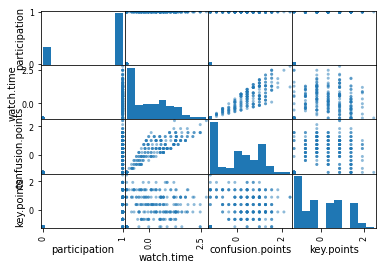

In [37]:
pd.plotting.scatter_matrix(norvideoData.iloc[:,3:])

In [38]:
Xs = videoData[["participation", "confusion.points", "key.points"]].to_numpy()
watchTime = videoData.loc[:,"watch.time"].values.reshape(-1, 1)

In [39]:
videoModel = LinearRegression()
videoModel.fit(Xs, watchTime)
print("The intercept is: ", videoModel.intercept_)
print("The slope is: ", videoModel.coef_)

The intercept is:  [0.]
The slope is:  [[ 0.55757518  2.08731237 -0.15120358]]


In [40]:
from statsmodels.api import OLS
videoModelOLS = OLS(watchTime, Xs)
videoModelOLSFit = videoModelOLS.fit()
print(videoModelOLSFit.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.919
Model:                            OLS   Adj. R-squared (uncentered):              0.918
Method:                 Least Squares   F-statistic:                              1117.
Date:                Wed, 13 Oct 2021   Prob (F-statistic):                   2.36e-161
Time:                        14:52:38   Log-Likelihood:                         -807.73
No. Observations:                 300   AIC:                                      1621.
Df Residuals:                     297   BIC:                                      1633.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------